<a href="https://colab.research.google.com/github/LucasEmanoel/ChurnPrediction/blob/main/C%C3%B3pia_de_%5BTemplate%5D_Churn_Prediction_para_uma_empresa_de_Telecomunica%C3%A7%C3%B5es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Churn Prediction

*Churn rate*, ou simplesmente *churn*, representa a taxa de evasão da sua base de clientes. Em serviços como Spotify ou Netflix, ela representaria a taxa de cancelamento de assinaturas.

<p align=center>
<img src="https://raw.githubusercontent.com/carlosfab/dsnp2/master/img/churnrate.jpg" width="60%"></p>

Ela é de extrema importância para a administração e sua análise ao longo do tempo pode mostrar que existe algum problema que deve ser atacado.

*Churn* também pode ser usado para identificar potenciais cancelamentos, com um tempo de antecedência, e promover ações direcionadas para tentar reter tais clientes. Essa métrica deve receber atenção pelo fato de que o Custo de Aquisição de Cliente (CAC) é normalmente mais alto que o custo para mantê-los. Ou seja, um alto valor para o *churn rate* é o que não desejamos.

## Aquisição dos Dados

Os dados utilizados neste projeto foram originalmente disponibilizados na [plataforma de ensino da IBM Developer](https://developer.ibm.com/technologies/data-science/patterns/predict-customer-churn-using-watson-studio-and-jupyter-notebooks/#), e tratam de um problema típico de uma companhia de telecomunicações. O *dataset* completo pode ser encontrado [neste link](https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv).

Apesar de não haver informações explícitas disponíves, os nomes das colunas permitem um entendimento a respeito do problema.

In [1]:
# importar os pacotes necessários
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# importar os dados
DATA_PATH = "https://raw.githubusercontent.com/victor-ferreira/dataset/main/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(DATA_PATH)

# ver as 5 primeiras entradas
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
df['Churn'].value_counts()[1]

1869

##INSTALAÇÔES USANDO PIP

In [3]:
import sys
!pip install -U pandas-profiling
!pip install scikit-plot -q
!pip install imbalanced-learn -q


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 325 kB 5.3 MB/s 
     |████████████████████████████████| 9.9 MB 12.2 MB/s 
     |████████████████████████████████| 62 kB 782 kB/s 
     |████████████████████████████████| 102 kB 40.1 MB/s 
     |████████████████████████████████| 679 kB 40.5 MB/s 
     |████████████████████████████████| 4.7 MB 44.1 MB/s 
     |████████████████████████████████| 296 kB 29.5 MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=16d0056952acede9fa88f194496a2c795127c89688f3602f1492d5f8d5362319
  Stored in directory: /root/.cache/pip/wheels/23/14/6e/4be5bfeeb027f4939a01764b48edd5996acf574b0913fe5243
Successfully built htmlmin
  Attempting uninstall: typeguard
    Found existing installation: typeguard 2.7.1
    Uninstalling typeguard-2.7.1:
      Successfully uninstalled typeguard-2.7.1
  Attempting uninstall: statsmodels
    Found e

##IMPORTS

In [4]:
#exploração
from warnings import simplefilter
from pandas_profiling import ProfileReport
from sklearn.preprocessing import normalize

#preparação
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler

#modelo
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from xgboost import XGBClassifier

simplefilter(action='ignore', category=FutureWarning)

##EXPLORAR OS DADOS

In [5]:
print("Linhas: {}\f".format(df.shape[0]))
print("Colunas: {}\f\n".format(df.shape[1]))
print("Todas colunas: ", list(df.columns))

df.info()

Linhas: 7043
Colunas: 21

Todas colunas:  ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   Onl

In [6]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [ ]:
#verificando valores nulos
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
#nao temos dados duplicados
df[df.duplicated()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [ ]:
#analise de alguns valores categoricos
print(df['MultipleLines'].unique())
print(df['gender'].unique())
print(df['InternetService'].unique())
print(df['Contract'].unique())


['No phone service' 'No' 'Yes']
['Female' 'Male']
['DSL' 'Fiber optic' 'No']
['Month-to-month' 'One year' 'Two year']


No     73.463013
Yes    26.536987
Name: Churn, dtype: float64


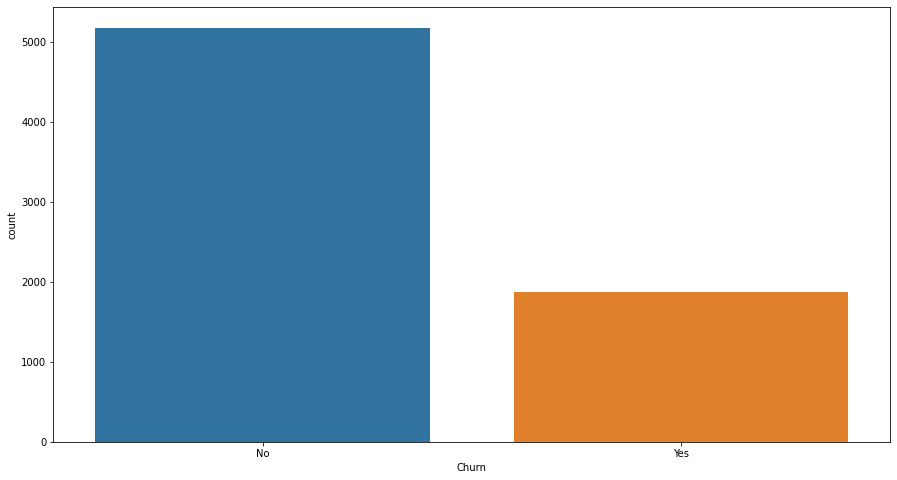

In [ ]:
#desbalaceamentos
fig, ax = plt.subplots(figsize=(15, 8))

print(df['Churn'].value_counts() / df.shape[0] * 100)
sns.countplot(x="Churn", data=df, ax=ax)
plt.show()

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


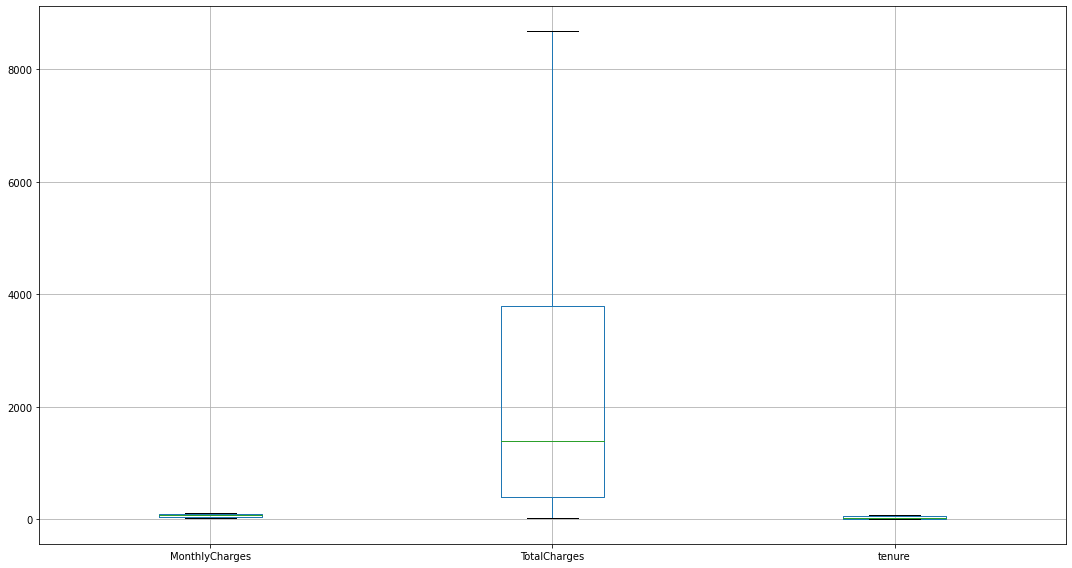

In [ ]:
#mostrando como ficam os dados sem padronizacao
fig, ax = plt.subplots(figsize=(15, 8))

df.boxplot(['MonthlyCharges', 'TotalCharges', 'tenure'],  ax=ax)

plt.tight_layout()
#Com a descrição apresentada só consegui pensar em ohar os valores numericos e tentei visualizar outliers usando boxplot!!

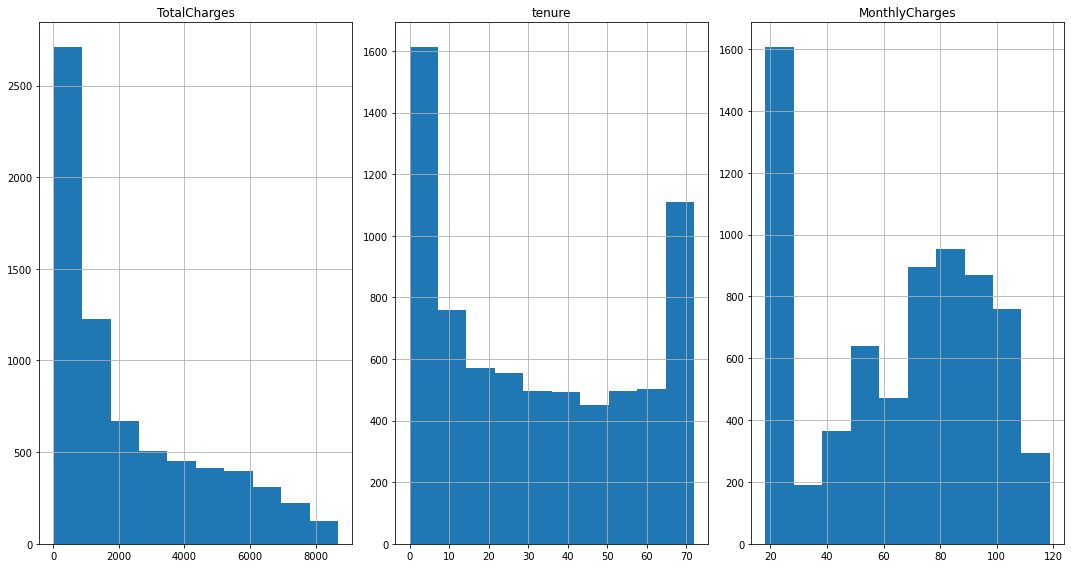

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 8))

df.hist(['TotalCharges'],  ax=ax1)
df.hist(['tenure'], ax=ax2)
df.hist(['MonthlyCharges'], ax=ax3)


plt.tight_layout()
#Tipos de distribuição

In [ ]:
#decide comparar a media de gastos dos clientes por tipo de contrato
#dai podemos concluir que a empresa deve investir para reter clientes para planos anuais
df.groupby(['Contract']).mean()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
Contract,,,,
Month-to-month,0.208258,18.036645,66.398490,1369.254581
One year,0.128988,42.044807,65.048608,3034.683084
Two year,0.085546,56.735103,60.770413,3728.933947


In [ ]:
#da pra entender que o melhor cliente é oque escolhe metodos automaticos de pagamento
#ele gasta mais e fica mais tempo no serviço
df.groupby(['PaymentMethod']).mean()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
PaymentMethod,,,,
Bank transfer (automatic),0.150907,43.656736,67.192649,3079.299546
Credit card (automatic),0.145204,43.269382,66.512385,3071.396022
Electronic check,0.251163,25.174630,76.255814,2090.868182
Mailed check,0.058313,21.830025,43.917060,1054.483915


In [ ]:
#clientes com fiber optic tendem a gastar mais porem nao apontam maior tempo de uso
#em relação a outros tipos
df.groupby(['InternetService']).mean()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
InternetService,,,,
DSL,0.106981,32.821561,58.102169,2119.789259
Fiber optic,0.268411,32.917959,91.500129,3205.304570
No,0.034076,30.547182,21.079194,665.220329


/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


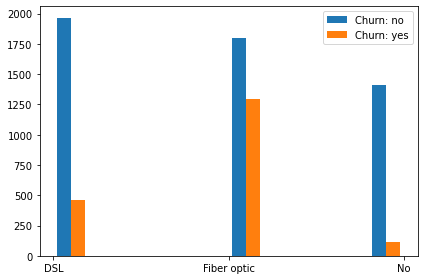

In [ ]:
plt.hist([df[df.Churn=='No'].InternetService, df[df.Churn=='Yes'].InternetService], label=['Churn: no', 'Churn: yes'])


plt.legend()
plt.tight_layout()

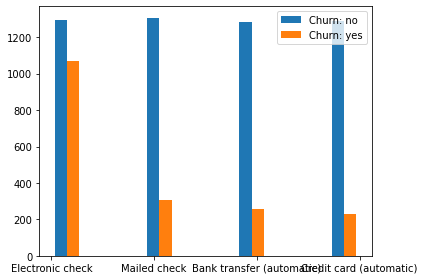

In [ ]:
plt.hist([df[df.Churn=='No'].PaymentMethod, df[df.Churn=='Yes'].PaymentMethod], label=['Churn: no', 'Churn: yes'])
plt.legend()
plt.tight_layout()

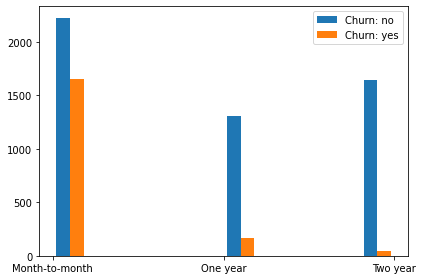

In [ ]:
plt.hist([df[df.Churn=='No'].Contract, df[df.Churn=='Yes'].Contract], label=['Churn: no', 'Churn: yes'])

plt.legend()
plt.tight_layout()

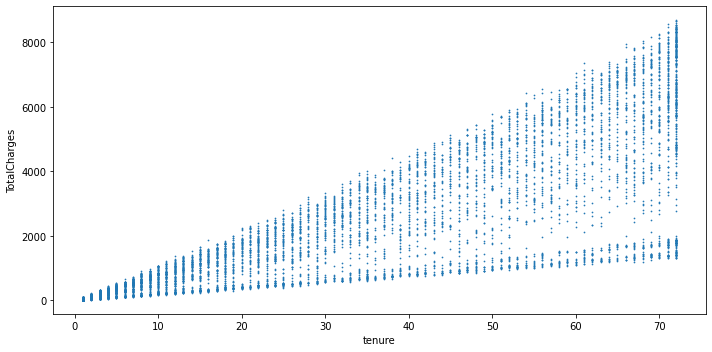

In [ ]:
#plotar um scatter mostrando correlação
fig, ax = plt.subplots(figsize=(10,5))

df.plot.scatter(x='tenure', y='TotalCharges', ax=ax, s=.5)

plt.tight_layout()

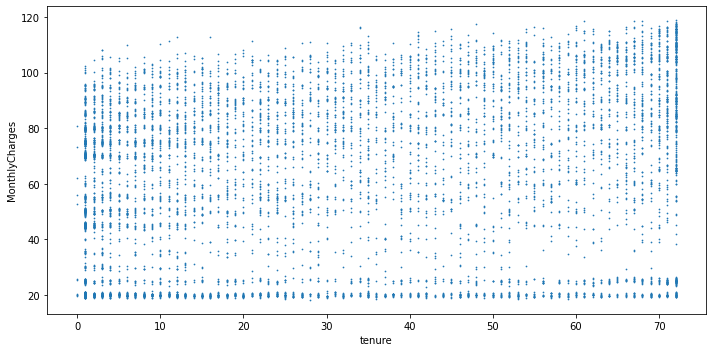

In [ ]:

fig, ax = plt.subplots(figsize=(10,5))

df.plot.scatter(x='tenure', y='MonthlyCharges', ax=ax, s=.5)

plt.tight_layout()

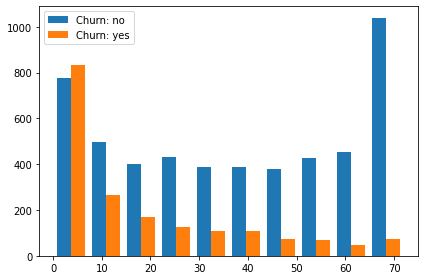

In [ ]:
#histgrama de tenure e cancelamentos
plt.hist([df[df.Churn=='No'].tenure, df[df.Churn=='Yes'].tenure], label=['Churn: no', 'Churn: yes'])

plt.legend()
plt.tight_layout()
#Notase que com o passar do tempo o usuario utilizando o serviço ele fica retido!!

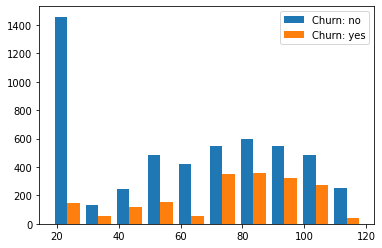

In [ ]:
plt.hist([df[df.Churn=='No'].MonthlyCharges, df[df.Churn=='Yes'].MonthlyCharges], label=['Churn: no', 'Churn: yes'])
plt.legend()
#Notamos que os usuarios entre gastos de 80 a 100 

In [ ]:
#profile = ProfileReport(df, title="Pandas Profiling Report", explorative=True)
#profile.to_file("output.html")

##***Pontos Observados Na Seção de Exploração***:



*   Data frame apenas 11 valores NaN
*   TotalCharges - deve ser convertida para float64
*   Diferença de 73%/26% nos valores de churn
    *     Aqui encontro o desbalaceamento!
*   Tentei identificar outliers em TotalCharges:
    *     Em minha analise não tem.
*   Observei que a distribuição de TotalCharges é logaritmica
*   Agrupei alguns dados categoricos para descobrir relações com o tempo em que o cliente fica no serviço.
    *   Foram: Tempo de contrato, Metodos de pagamento e Serviço de internet.

*   Procurei uma correlação entre o tempo de uso(Tenure) e total gasto(TotalCharges)
*   Descobri que o profiling fazia tudo isso de forma facil
    - Valores de ID não são uteis e podem ser descartados.
    - Não consegui identificar valores externos(nao entendi)!

##PREPARAÇÃO DOS DADOS

* Limpeza dos Dados


In [ ]:
#esta deletando 11 linhas apenas
df.dropna(inplace = True, axis=0)

* Seleção de atributos
    * Eliminar os atributos (*features*) que não contêm informações úteis

In [ ]:
#dropar coluna de id
df.drop(['customerID'], axis=1, inplace=True)

* *Feature Engineering*

* Discretizar variáveis contínuas

1. Decompor *features* (categóricas, data, tempo)
2. Aplicar transformações às variáveis
3. Agregar *features* para gerar novas

In [ ]:
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [ ]:
#tranformando booleans
df.replace({'Yes': 1, 'No': 0}, inplace=True)
df['gender'].replace({'Male': 1, 'Female': 0}, inplace=True)
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,No phone service,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1


In [ ]:
#Dados categoricos visualizei pelo profiling
df.replace({'No phone service': 3, 'No internet service': 3}, inplace=True)#seperar no dummies
df['InternetService'].replace({'DSL': 1, 'Fiber optic': 2}, inplace=True)#seperar no dummies
#df['Contract'].replace({'Month-to-month': 0, 'One year': 1, 'Two year': 2}, inplace=True)

#no restante de valores categoricos > 3, vou usar get_dummies()
df = pd.get_dummies(df)
df.head(3)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,MonthlyCharges,TotalCharges,Churn,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,3,1,0,1,...,29.85,29.85,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,1,0,...,56.95,1889.50,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,1,...,53.85,108.15,1,1,0,0,0,0,0,1


In [ ]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [ ]:
#relatorio do novo df
#profile = ProfileReport(df, title="Pandas Profiling Report", explorative=True)
#profile.to_file("output.html")

* *Feature Scaling*
    * Normalizar ou padronizar *features*

In [ ]:
scaler = MinMaxScaler()

#normalizando a base de dados ou seja reduzirei a escala pra 0 - 1
norm = scaler.fit(df)
df_norm = norm.transform(df)

df_norm = pd.DataFrame(df_norm)
df_norm.columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']

df_norm.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,MonthlyCharges,TotalCharges,Churn,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.0,1.0,0.0,0.000000,0.0,1.0,0.5,0.000000,0.333333,...,0.115423,0.001275,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.464789,1.0,0.0,0.5,0.333333,0.000000,...,0.385075,0.215867,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.014085,1.0,0.0,0.5,0.333333,0.333333,...,0.354229,0.010310,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.619718,0.0,1.0,0.5,0.333333,0.000000,...,0.239303,0.210241,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.014085,1.0,0.0,1.0,0.000000,0.000000,...,0.521891,0.015330,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
df_norm['TotalCharges'].describe()

count    7032.000000
mean        0.261309
std         0.261571
min         0.000000
25%         0.044155
50%         0.159090
75%         0.435719
max         1.000000
Name: TotalCharges, dtype: float64

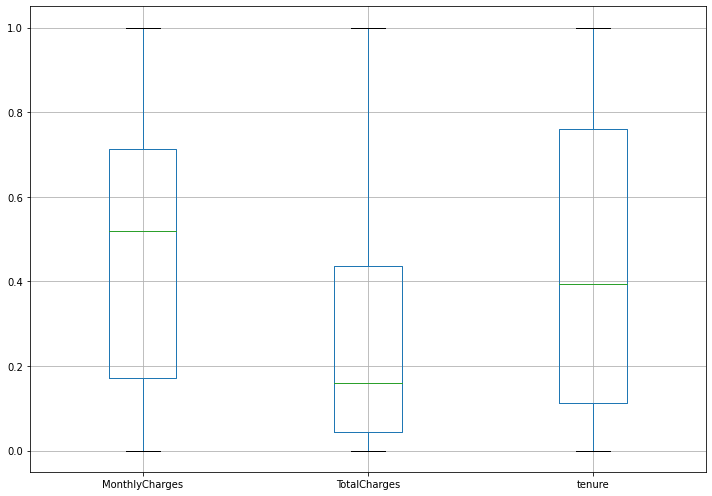

In [ ]:
fig, ax = plt.subplots(figsize=(10,7))

df_norm.boxplot(['MonthlyCharges', 'TotalCharges', 'tenure'], ax=ax)
plt.tight_layout()


* Dividir entre treino, teste e validação

In [ ]:
X = df_norm.drop('Churn', axis=1)
y = df_norm.Churn


In [ ]:
#over sampling 
#from imblearn.over_sampling import RandomOverSampler


# define oversampling strategy
oversample = SMOTE()
# fit and apply the transform
X, y = oversample.fit_resample(X, y)

In [ ]:
print(y.value_counts())

0.0    5163
1.0    5163
Name: Churn, dtype: int64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

##CONSTRUIR MODELO(S) DE MACHINE LEARNING



* Analisar as variáveis mais significativas para cada algoritmo
* *Hyperparameters Tuning* (se necessário)
* Uso de *cross-validation*
* Verificar o desempenho do(s) modelo(s) e considerar métodos *Ensemble*

In [ ]:
SEED = 42
np.random.seed(SEED)

model = GradientBoostingClassifier(max_depth=5)
model2 = XGBClassifier(max_depth=5)
model3 = DecisionTreeClassifier(max_depth=5)
model4 = LogisticRegression()

#min_samples_leaf=34

#treinar o modelo
model.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)
model4.fit(X_train, y_train)

#X_test = scaler.transform(X_test)
y_pred = model.predict(X_test)
y_pred2 = model2.predict(X_test)
y_pred3 = model2.predict(X_test)
y_pred4 = model2.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
accr = model.score(X_test, y_test)
accr2 = model2.score(X_test, y_test)
accr3 = model3.score(X_test, y_test)
accr4 = model3.score(X_test, y_test)

print('(Model GradientBoostingClassifier) score = ', accr)
print('(Model XGBClassifier) score = ', accr2)
print('(DecisionTreeClassifier) score = ', accr3)
print('(LogisticRegression) score = ', accr4)

(Model GradientBoostingClassifier) score =  0.8617350890782339
(Model XGBClassifier) score =  0.8621223857474826
(DecisionTreeClassifier) score =  0.8117738187451587
(LogisticRegression) score =  0.8117738187451587


In [ ]:
#relatorio de classificação
mat = confusion_matrix(y_pred, y_test)
mat2 = confusion_matrix(y_pred2, y_test)

print(mat)
print(classification_report(y_test, y_pred))

[[1106  180]
 [ 177 1119]]
              precision    recall  f1-score   support

         0.0       0.86      0.86      0.86      1283
         1.0       0.86      0.86      0.86      1299

    accuracy                           0.86      2582
   macro avg       0.86      0.86      0.86      2582
weighted avg       0.86      0.86      0.86      2582



In [ ]:
print(mat2)
print(classification_report(y_test, y_pred2))

[[1077  196]
 [ 191 1118]]
              precision    recall  f1-score   support

         0.0       0.85      0.85      0.85      1268
         1.0       0.85      0.85      0.85      1314

    accuracy                           0.85      2582
   macro avg       0.85      0.85      0.85      2582
weighted avg       0.85      0.85      0.85      2582



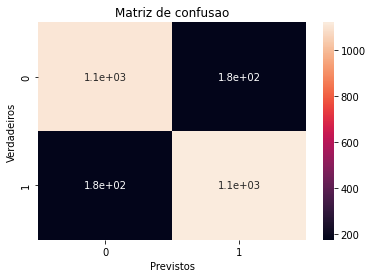

In [ ]:
#matriz de confusao

fig, ax = plt.subplots()
sns.heatmap(mat, annot=True, ax=ax)

ax.set_title("Matriz de confusao")
ax.set_ylabel("Verdadeiros")
ax.set_xlabel("Previstos")

plt.show()

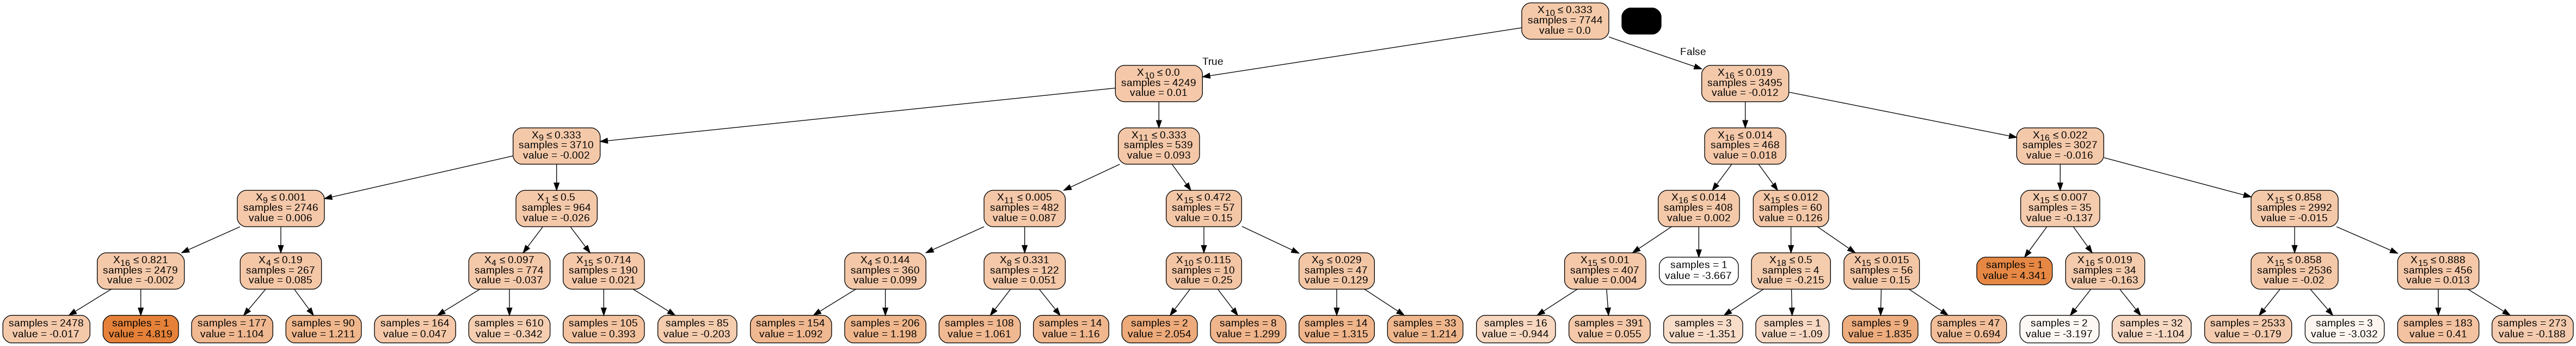

In [ ]:
from pydotplus import graph_from_dot_data
from IPython.display import Image
from sklearn.tree import export_graphviz

sub_tree_42 = model.estimators_[42, 0]

dot_data = export_graphviz(
    sub_tree_42,
    out_file=None, filled=True, rounded=True,
    special_characters=True,
    proportion=False, impurity=False, # enable them if you want
)
graph = graph_from_dot_data(dot_data)
Image(graph.create_png())

In [ ]:
#Acuracia modelo puro(sem oversampling e normalization)               acuracia          f1-score
#LogisticRegression                                                     79%             86%/59%
#TreeClassifier                                                         78%             86%/55%
#Gradiente                                                              79%             86%/58%
#OVERSAMPLING
#Gradiente                                                              79%             79%/79%
#SMOTE
#Gradiente                                                              84%             85%/85%
#SMOTE + StandardScaler
#Gradiente                                                              84%             84%/85%
#XGBClassifier + over sampling + minmax                                 84%             83%/85%


